In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

73728/61306 [====================================] - 0s 0us/step
float32


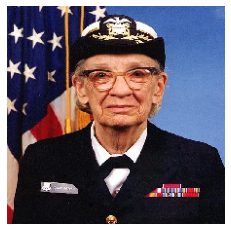

In [2]:
file = tf.keras.utils.get_file(
    "grace_hopper.jpg",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg")

img = tf.keras.preprocessing.image.load_img(file, target_size=[224, 224]) # class: PIL.Image.Image
plt.imshow(img)
plt.axis('off')

x = tf.keras.preprocessing.image.img_to_array(img)                       # x.shape: (224, 224, 3), numpy.ndarray
x = tf.keras.applications.mobilenet.preprocess_input(x[tf.newaxis, ...]) # x.shape: (1, 224, 224, 3)
print(x.dtype)

In [4]:
loaded = tf.saved_model.load("C:/Users/2019A00298/Desktop/tutorial/")
print(list(loaded.signatures.keys())) # ["serving_default"]

# signature always returns dictionary

['serving_default']


In [5]:
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

((), {'input_1': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1')})
{'predictions': TensorSpec(shape=(None, 1000), dtype=tf.float32, name='predictions')}


In [6]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines()) # shape: (1001, )

In [7]:
labeling = infer(tf.constant(x))['predictions']
print(type(labeling))

decoded = imagenet_labels[np.argsort(labeling)[0, ::-1][:5]+1]
print(decoded)

<class 'tensorflow.python.framework.ops.EagerTensor'>
['military uniform' 'bow tie' 'suit' 'bearskin' 'pickelhaube']
